In [14]:
#Assignement 3
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn import mixture
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
 
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline
#data=pd.read_fwf('page-blocks.txt',header=None)
data = pd.read_csv("dia.csv", sep=",", header=None, index_col=False)
#data.describe(include='all')

X=data.iloc[:,0:19].values

Y=data.iloc[:,19].values

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from __future__ import print_function
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.3, random_state=0)
# rescale all the data

scalerMinMax = MinMaxScaler()
scalerStandard=StandardScaler()
scalerMinMax.fit(X_train)
scalerStandard.fit(X_train)
X_train_scaledMinMax=scalerMinMax.transform(X_train)
X_train_scaledStandard=scalerStandard.transform(X_train)
X_test_scaledMinMax=scalerMinMax.transform(X_test)
X_test_scaledStandard=scalerStandard.transform(X_test)
display(X.shape)
scalerStandard.fit(X)
X_scaled=scalerStandard.transform(X)
display(X_scaled.shape)
OrigX=X
X=X_scaled

(1151, 19)

(1151, 19)

[0.5867052023121387,
 0.6184971098265896,
 0.6213872832369942,
 0.6213872832369942,
 0.6213872832369942,
 0.6242774566473989,
 0.6242774566473989,
 0.6416184971098265,
 0.6676300578034682,
 0.6936416184971098,
 0.6560693641618497,
 0.661849710982659,
 0.6560693641618497,
 0.653179190751445,
 0.7254335260115607,
 0.7023121387283237,
 0.7109826589595376,
 0.7398843930635838,
 0.7398843930635838]

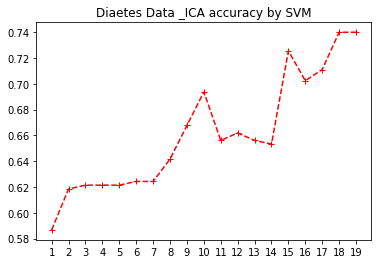

In [8]:
from sklearn.svm import SVC
from sklearn.decomposition import FastICA
score=[]
for n_component in range(1,20):
        ica = FastICA(n_components=n_component,random_state=5)
        ica.fit(X)
        X_ica=ica.transform(X)
        X_train, X_test, Y_train, Y_test = train_test_split(X_ica, Y, stratify=Y, test_size=0.3, random_state=0)
        clf =SVC(C=3000, gamma=0.1, kernel='rbf')
        clf.fit(X_train, Y_train)        
        score.append(clf.score(X_test,Y_test))
        
display(score)
plt.plot(range(1,20),score,'--r+')
plt.xticks(range(1,20))
plt.title("Diaetes Data _ICA accuracy by SVM")
plt.show()



In [65]:
#from sklearn.decomposition import FastICA
#ica = FastICA(random_state=5)
#kurt ={}
#for dim in range(1,19):
 #   ica.set_params(n_components=dim)
  #  tmp = ica.fit_transform(X)
   # tmp = pd.DataFrame(tmp)
    #tmp = tmp.kurt(axis=0)
    #kurt[dim] = tmp.abs().mean()
#plt.plot(range(1,19),kurt.values(),'--*')
#plt.xticks(range(1,19))
 

Text(0.5,0,u'ICA components')

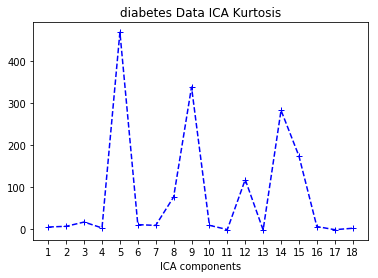

In [9]:
kurt ={}
ica = FastICA(random_state=5, n_components=18) 
X_ica=ica.fit_transform(X)
tmp = ica.fit_transform(X)
tmp = pd.DataFrame(tmp)
tmp = tmp.kurt(axis=0)

plt.plot(range(1,19),tmp,'--b+')
plt.title('diabetes Data ICA Kurtosis')
plt.xticks(range(1,19))
plt.xlabel("ICA components")

In [10]:
#test=pd.DataFrame ({'ica1': tmp[5],'ica2':tmp[8],'ica3': tmp[9].T,'ica4': tmp[12].T,'ica5':tmp[12].T,'ica6':tmp[15].T})
print("transformedX")
display(X_ica[:,5])
print("before transformed")
display(X[5])
ica_sel=np.column_stack((X_ica[:,5].T,X_ica[:,8].T,X_ica[:,9].T,X_ica[:,12].T,X_ica[:,14].T,X_ica[:,15].T))
 

transformedX


array([ 0.02838369,  0.02338882,  0.01037478, ...,  0.01172102,
       -0.01672177,  0.00287126])

before transformed


array([ 0.05905386,  0.2982129 ,  0.21756051,  0.25276287,  0.25703561,
        0.41234887,  0.42320544,  0.51996209, -0.61136417, -0.74802691,
       -0.5534101 , -0.38575998, -0.22582799, -0.20090532, -0.21496782,
       -0.2080998 , -0.72678128,  1.02077521, -0.7117194 ])

[0.24085357276608937,
 0.2483920276520101,
 0.25171387132254464,
 0.26403725230097236,
 0.2705414058981986,
 0.28704168082157105,
 0.2575709677467126,
 0.2591853140350157,
 0.255276350167279,
 0.22475673271246752,
 0.23239005731028808,
 0.2110828435835351,
 0.22521417625637932,
 0.21456791664743244,
 0.21563238926247347,
 0.21598689742626803,
 0.2182618987232841,
 0.22025972117831286]

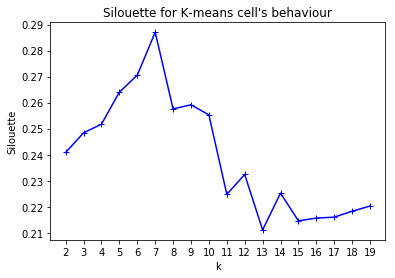

(1151,)

In [89]:

from sklearn.metrics import silhouette_score
s = []
for n_components in range(2,20):
    clusterer = KMeans(n_clusters=n_components,random_state=12,init='k-means++')
    clusterer.fit(ica_sel)
    labels = clusterer.predict(ica_sel)
    s.append(silhouette_score(ica_sel, labels, metric='euclidean'))
display(s)
plt.plot(range(2,20),s,'-b+')
plt.ylabel("Silouette")
plt.xlabel("k")
plt.xticks(range(2,20))
plt.title("Silouette for K-means cell's behaviour")
plt.show()
display(Y.shape)

Automatically created module for IPython interactive environment
next


No handlers could be found for logger "matplotlib.legend"


array([-29028.43424562, -32285.83582569, -32537.26552479, -34173.43436956,
       -34290.21329965, -34320.23359798, -34564.62704539, -34789.85897818,
       -34954.92383888, -35050.98821748, -35180.87258581, -35236.39131707,
       -34957.0282628 , -35569.34392356, -35533.31226782, -35591.98452476,
       -35498.44068633, -35560.35230143, -35574.23301812, -28887.46651745,
       -29502.30420115, -29665.8060406 , -29840.12320857, -31742.69958744,
       -31892.41421927, -32126.74841683, -31038.56650101, -33119.12657651,
       -32508.09631027, -32946.12041099, -33050.14582974, -33885.98264241,
       -33736.85443688, -33410.96610646, -34188.8164401 , -33640.73966779,
       -33940.63936163, -33276.18965466, -28993.19231358, -38082.15447522,
       -38423.29009214, -39319.99892551, -39513.70922512, -39632.85522114,
       -39775.99372245, -39690.65739105, -39776.42872961, -39865.59776439,
       -39847.03053925, -39795.65694453, -39906.87500076, -39872.02001142,
       -39816.12890787, -

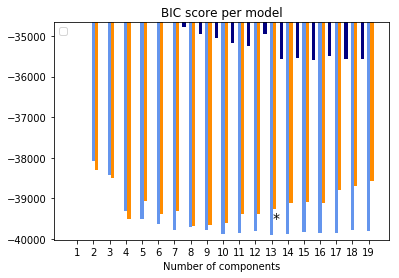

In [79]:
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

print(__doc__)

# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
lowest_bic = np.infty
bic = []
n_components_range = range(1, 20)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(ica_sel)
        bic.append(gmm.bic(ica_sel))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
spl = plt.subplot()
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()*1.2])
#plt.ylim(-40000,80000)

plt.legend( loc=2)
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
plt.xlabel('Number of components')
#spl.legend([b[0] for b in bars], cv_types, bbox_to_anchor=(0., 1.02, 1., .102), loc=9,ncol=4, mode="expand", borderaxespad=0.)
#spl.legend([b[0] for b in bars], cv_types,ncol=2)
plt.title('BIC score per model')
print('next')
# Plot the winner
display(bic)

Homogeneity for 7 cluster: 0.110 
mutual index for 7 cluster: 0.055 
completnenss for 7 cluster: 0.057 


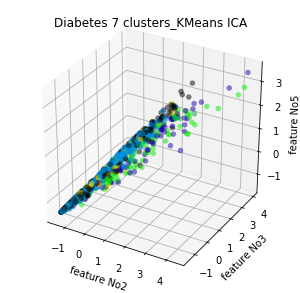

In [11]:
clusterer = KMeans(n_clusters=7,random_state=12,init='k-means++')
clusterer.fit(ica_sel)
cluster_labels = clusterer.predict(ica_sel)
colors = cm.spectral(cluster_labels.astype(float) /7)
fig = plt.figure(figsize=(5, 5))
ax1=fig.add_subplot(111,projection='3d') 
ax1.scatter(X[:, 2], X[:, 3],X[:,5], s=30,lw=0, alpha=0.5,
                c=colors, edgecolor='K');
ax1.set_xlabel('feature No2 ')
ax1.set_ylabel('feature No3')
ax1.set_zlabel('feature No5')
ax1.set_title('Diabetes 7 clusters_KMeans ICA')
print("Homogeneity for 7 cluster: %0.3f " % metrics.homogeneity_score(Y, cluster_labels))
print("mutual index for 7 cluster: %0.3f " % metrics.adjusted_mutual_info_score(Y, cluster_labels))
print("completnenss for 7 cluster: %0.3f " % metrics.completeness_score(Y, cluster_labels))

In [2]:
#



In [1]:
#

In [3]:
#

Homogeneity for 13 cluster: 0.196 
mutual index for 13 cluster: 0.068 
completnenss for 13 cluster: 0.071 


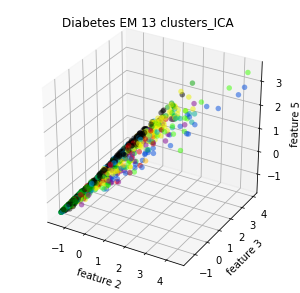

In [15]:
fig = plt.figure(figsize=(5, 5))
ax2=fig.add_subplot(111,projection='3d')
gmm = mixture.GaussianMixture(n_components=13, covariance_type='full',random_state=0)
gmm.fit(ica_sel)
cluster_labels = gmm.predict(ica_sel)
colors = cm.spectral(cluster_labels.astype(float) / 13)
ax2.scatter(X[:, 2], X[:, 3],X[:,5],s=30, lw=0, alpha=0.5,
                c=colors, edgecolor='k')  

 
ax2.set_xlabel('feature 2 ')
ax2.set_ylabel('feature 3')
ax2.set_zlabel('feature 5')
ax2.set_title('Diabetes EM 13 clusters_ICA ')
 
print("Homogeneity for 13 cluster: %0.3f " % metrics.homogeneity_score(Y, cluster_labels))
print("mutual index for 13 cluster: %0.3f " % metrics.adjusted_mutual_info_score(Y, cluster_labels))
print("completnenss for 13 cluster: %0.3f " % metrics.completeness_score(Y, cluster_labels))

In [82]:
#

In [83]:
#

In [4]:
#

In [5]:
#

In [13]:
#